## Overview
This proect aims to develop a predictive model that can determine whether an arrest will be made during a Terry Stop based on various factors. The aim is to provide actionable insights that can help law enforcement agencies optimize their stop-and-search strategies, ensure public safety, and address concerns related to racial profiling and fairness in policing. 

### Business Understanding: Enhancing Law Enforcement Practices
Terry Stops, based on Terry v. Ohio (1968), are brief stops and searches by police based on reasonable suspicion. These stops raise concerns about fairness and potential bias. The business challenge is to predict the likelihood of an arrest during a Terry Stop to improve decision-making and address potential biases. The business understanding of the project is to enhance law enforcement practices by providing a platform for data-driven decision. This project benefits law enforcement by improving efficiency and fairness, policymakers by providing data-driven insights, and the public by fostering trust and reducing unjustified stops and arrests.

In [109]:
# importing neccessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

### Data
The data has 61050 rows and 23 columns

In [110]:
# Load the data
terry_df = pd.read_csv('data/Terry_Stops.csv')
terry_df.head()

,Subject Age Group,Subject ID,GO / SC Num,Terry Stop ID,Stop Resolution,Weapon Type,Officer ID,Officer YOB,Officer Gender,Officer Race,...,Reported Time,Initial Call Type,Final Call Type,Call Type,Officer Squad,Arrest Flag,Frisk Flag,Precinct,Sector,Beat
0,1 - 17,-1,20170000315550,301338,Offense Report,NaN,5489,1964,M,White,...,00:10:00.0000000,NUISANCE,--MISCHIEF OR NUISANCE - GENERAL,911,NORTH PCT 3RD W - B/N RELIEF,N,N,North,N,N2
1,26 - 35,-1,20170000115391,253596,Offense Report,NaN,6403,1969,M,White,...,16:04:00.0000000,THEFT (DOES NOT INCLUDE SHOPLIFT OR SVCS),--THEFT - ALL OTHER,"TELEPHONE OTHER, NOT 911",NORTH PCT 2ND W - LINCOLN - PLATOON 1,N,N,North,L,L3
2,18 - 25,-1,20160000036392,123863,Offense Report,NaN,7473,1981,M,White,...,02:26:00.0000000,"SUSPICIOUS PERSON, VEHICLE, OR INCIDENT",--SUSPICIOUS CIRCUM. - SUSPICIOUS PERSON,911,NORTH PCT 3RD W - B/N RELIEF,N,N,North,B,B3
3,36 - 45,33919122751,20210000055627,21770133324,Field Contact,-,6711,1977,M,White,...,14:42:43.0000000,PROPERTY - DAMAGE,--DISTURBANCE - OTHER,911,SOUTHWEST PCT 2ND W - WILLIAM - PLATOON 2,N,N,-,-,-
4,18 - 25,-1,20160000003522,183376,Field Contact,NaN,7090,1981,F,White,...,15:49:00.0000000,-,-,-,SOUTHWEST PCT 2ND W - FRANK - PLATOON 2,N,Y,-,-,-


In [111]:
# Data information
terry_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61050 entries, 0 to 61049
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Subject Age Group         61050 non-null  object
 1   Subject ID                61050 non-null  int64 
 2   GO / SC Num               61050 non-null  int64 
 3   Terry Stop ID             61050 non-null  int64 
 4   Stop Resolution           61050 non-null  object
 5   Weapon Type               28485 non-null  object
 6   Officer ID                61050 non-null  object
 7   Officer YOB               61050 non-null  int64 
 8   Officer Gender            61050 non-null  object
 9   Officer Race              61050 non-null  object
 10  Subject Perceived Race    61050 non-null  object
 11  Subject Perceived Gender  61050 non-null  object
 12  Reported Date             61050 non-null  object
 13  Reported Time             61050 non-null  object
 14  Initial Call Type     

In [112]:
terry_df.shape


(61050, 23)

## Checking for Missing Values
The weapon type column has 32565 missing values and officer squad has 561 missing values.

In [113]:
#  check for missing data in the dataset
missing_values = terry_df.isnull().sum()
missing_values

Subject Age Group               0
Subject ID                      0
GO / SC Num                     0
Terry Stop ID                   0
Stop Resolution                 0
Weapon Type                 32565
Officer ID                      0
Officer YOB                     0
Officer Gender                  0
Officer Race                    0
Subject Perceived Race          0
Subject Perceived Gender        0
Reported Date                   0
Reported Time                   0
Initial Call Type               0
Final Call Type                 0
Call Type                       0
Officer Squad                 561
Arrest Flag                     0
Frisk Flag                      0
Precinct                        0
Sector                          0
Beat                            0
dtype: int64

## Analyze the Categorical Features

In [114]:
# List of categorical columns to analyze
categorical_cols = ['Subject Age Group', 'Stop Resolution', 'Subject Perceived Race', 'Subject Perceived Gender']

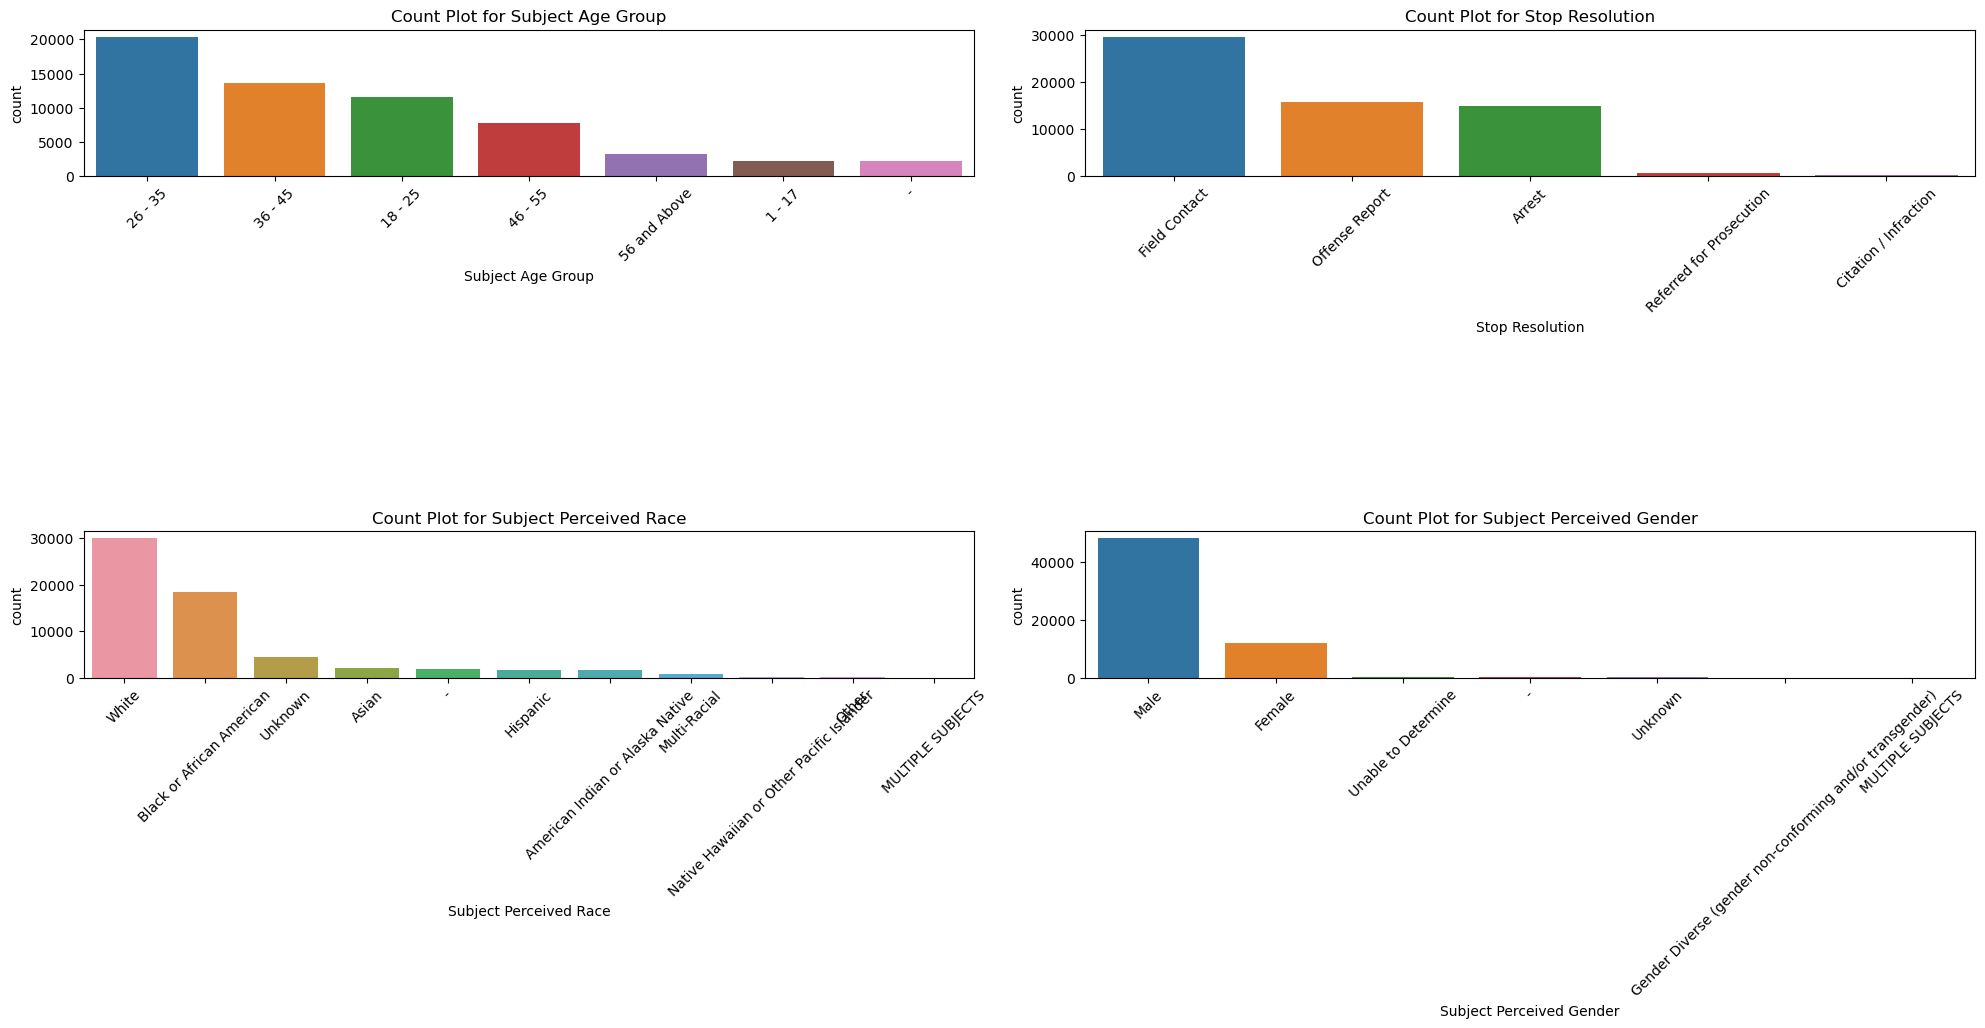

In [115]:
# Plot count plots for each categorical feature
plt.figure(figsize=(20, 12))
for i, col in enumerate(categorical_cols, 1):
    plt.subplot(3, 2, i)
    sns.countplot(x=col, data=terry_df, order=terry_df[col].value_counts().index)
    plt.title(f"Count Plot for {col}")
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Analyze the Distribution of the Target Variable (Arrest Flag)

We will use crosstabs to summarize the relationship between each categorical feature and the "Arrest Flag" and bar plots to visualize the proportion of arrests within each category of the features.

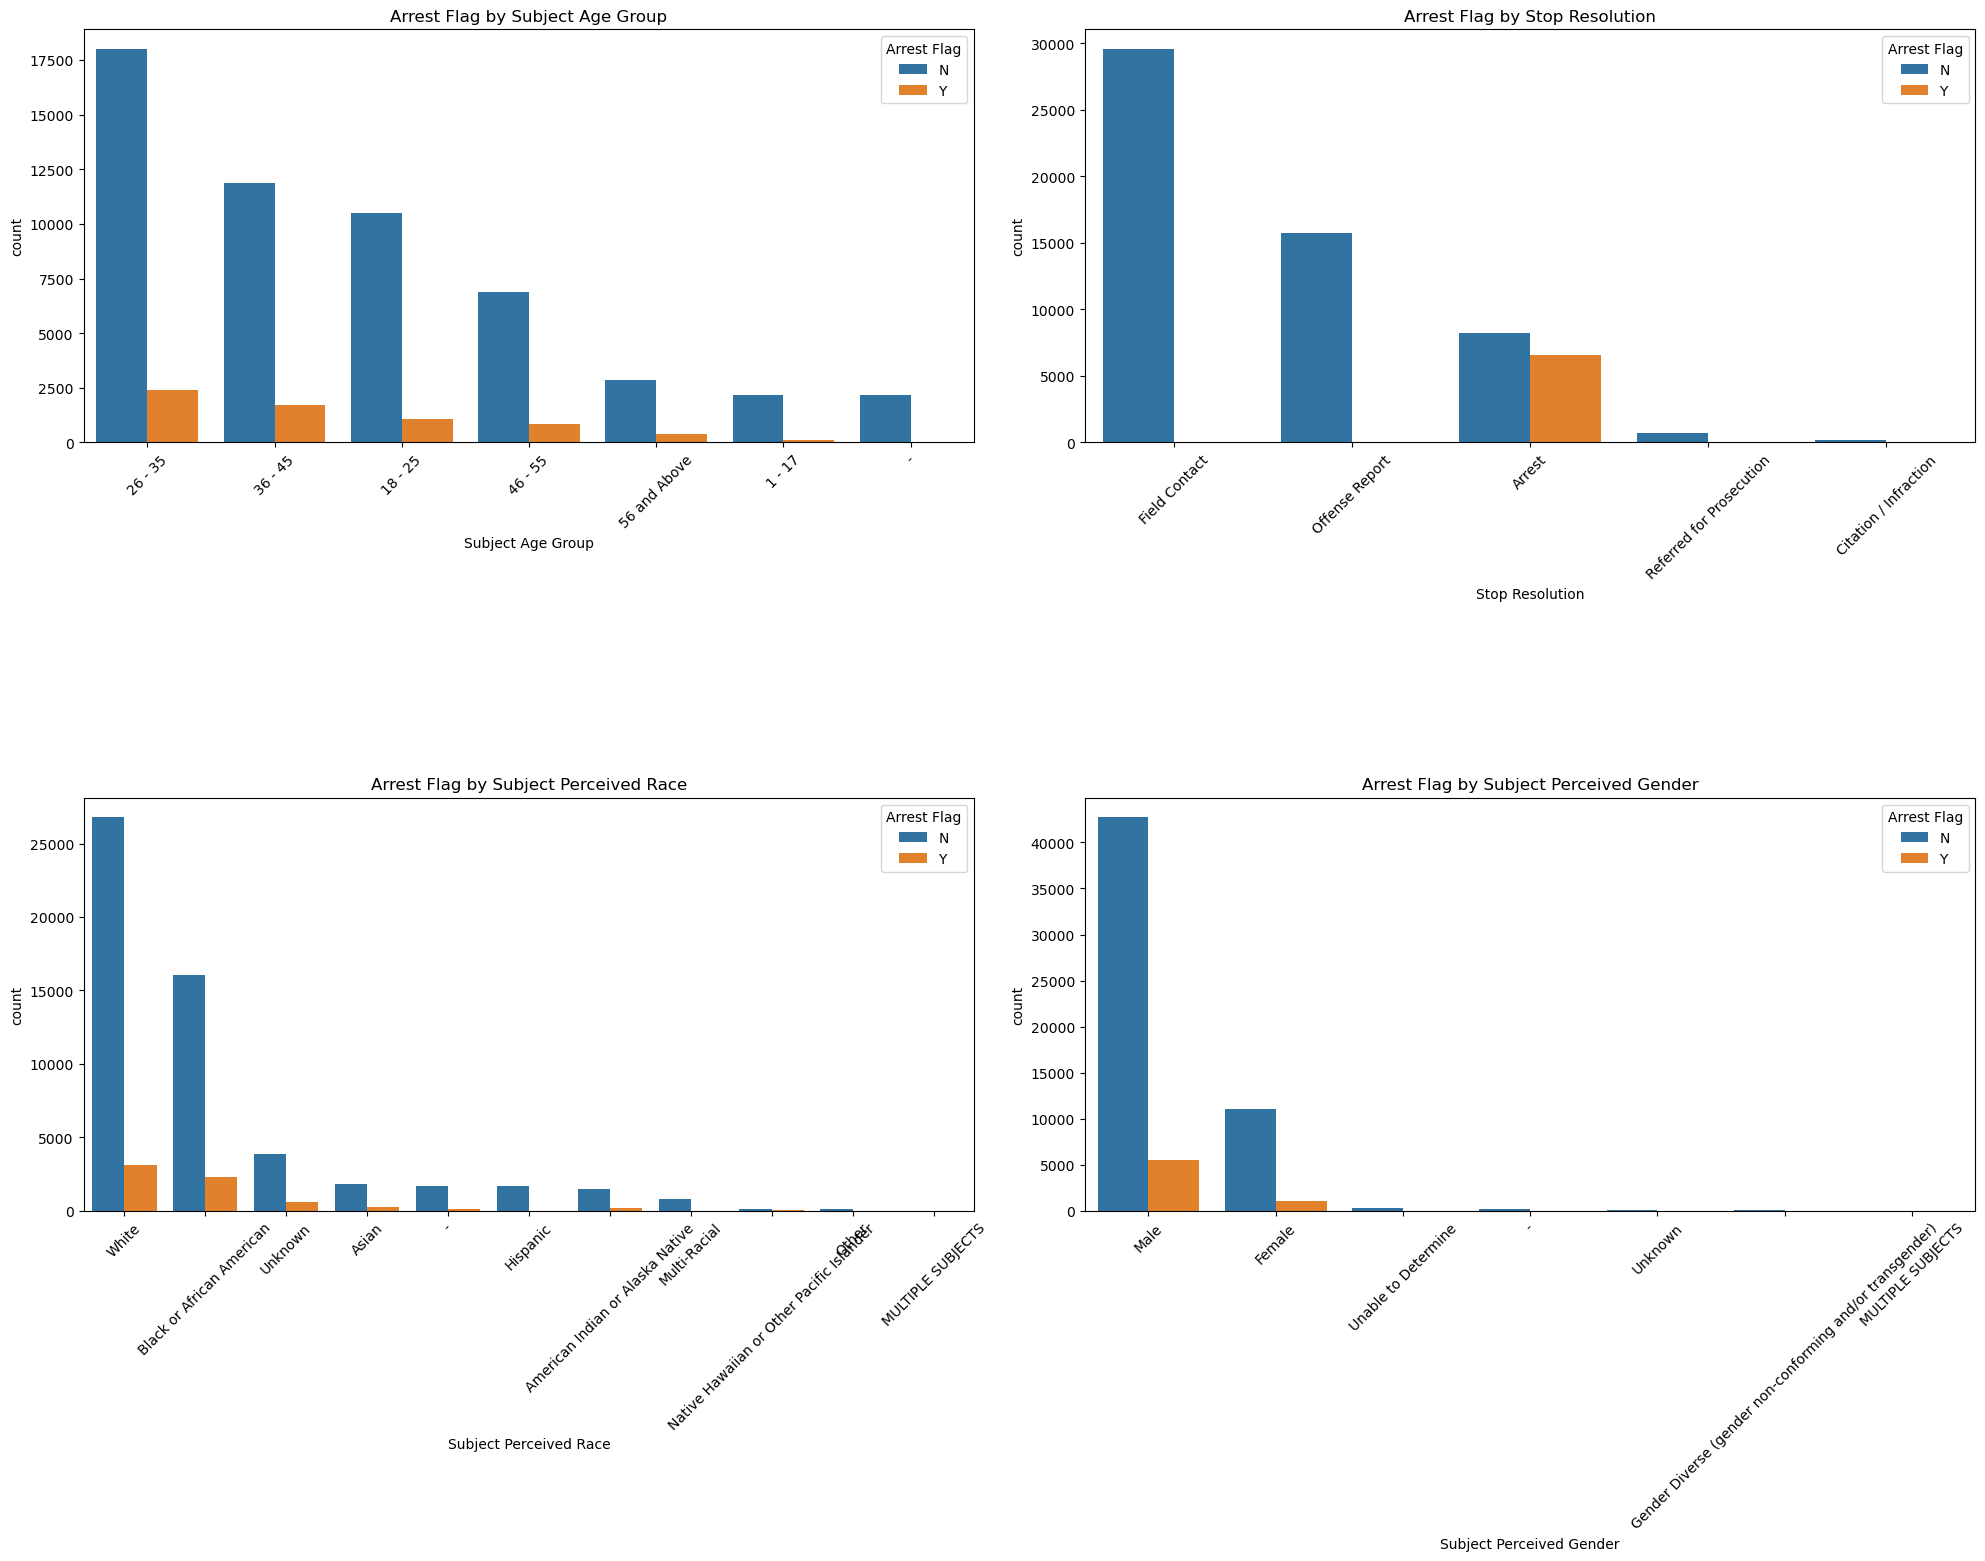

In [116]:
# Create bar plots for each categorical feature against the "Arrest Flag"
plt.figure(figsize=(20, 20))
for i, col in enumerate(categorical_cols, 1):
    plt.subplot(3, 2, i)
    sns.countplot(x=col, hue='Arrest Flag', data=terry_df, order=terry_df[col].value_counts().index)
    plt.title(f"Arrest Flag by {col}")
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [117]:
# Print crosstab for each categorical feature with "Arrest Flag"
for col in categorical_cols:
    crosstab_result = pd.crosstab(terry_df[col], terry_df['Arrest Flag'])
    print(f"Crosstab for {col} with Arrest Flag:\n", crosstab_result, "\n")

Crosstab for Subject Age Group with Arrest Flag:
 Arrest Flag            N     Y
Subject Age Group             
-                   2160    41
1 - 17              2155   131
18 - 25            10497  1085
26 - 35            18002  2387
36 - 45            11893  1735
46 - 55             6897   845
56 and Above        2856   366 

Crosstab for Stop Resolution with Arrest Flag:
 Arrest Flag                   N     Y
Stop Resolution                      
Arrest                     8210  6588
Citation / Infraction       219     0
Field Contact             29576     0
Offense Report            15729     0
Referred for Prosecution    726     2 

Crosstab for Subject Perceived Race with Arrest Flag:
 Arrest Flag                                    N     Y
Subject Perceived Race                                
-                                           1718    98
American Indian or Alaska Native            1488   175
Asian                                       1815   273
Black or African Americ

## Statistical tests to validate the significance of observed patterns
We are using Chi-square Test for Independence

In [118]:
from scipy.stats import chi2_contingency

# Performing Chi-square test for 'Subject Perceived Race' and 'Arrest Flag'
contingency_table = pd.crosstab(terry_df['Subject Perceived Race'], terry_df['Arrest Flag'])
chi2, p, dof, expected = chi2_contingency(contingency_table)

print(f"Chi-square Test Results for 'Subject Perceived Race' and 'Arrest Flag':\n Chi2: {chi2}, p-value: {p}")

# Interpretation of p-value
if p < 0.05:
    print("There is a significant association between 'Subject Perceived Race' and 'Arrest Flag'.")
else:
    print("No significant association between 'Subject Perceived Race' and 'Arrest Flag'.")

Chi-square Test Results for 'Subject Perceived Race' and 'Arrest Flag':
 Chi2: 503.15362641100324, p-value: 9.353668765101045e-102
There is a significant association between 'Subject Perceived Race' and 'Arrest Flag'.


In [119]:
# Performing Chi-square test for 'Subject Perceived Gender' and 'Arrest Flag'
contingency_table = pd.crosstab(terry_df['Subject Perceived Gender'], terry_df['Arrest Flag'])
chi2, p, dof, expected = chi2_contingency(contingency_table)

print(f"Chi-square Test Results for 'Subject Perceived Gender' and 'Arrest Flag':\n Chi2: {chi2}, p-value: {p}")

# Interpretation of p-value
if p < 0.05:
    print("There is a significant association between 'Subject Perceived Gender' and 'Arrest Flag'.")
else:
    print("No significant association between 'Subject Perceived Gender' and 'Arrest Flag'.")

Chi-square Test Results for 'Subject Perceived Gender' and 'Arrest Flag':
 Chi2: 132.59728273046457, p-value: 3.647072311038753e-26
There is a significant association between 'Subject Perceived Gender' and 'Arrest Flag'.


In [120]:
# Performing Chi-square test for 'Stop Resolution' and 'Arrest Flag'
contingency_table = pd.crosstab(terry_df['Stop Resolution'], terry_df['Arrest Flag'])
chi2, p, dof, expected = chi2_contingency(contingency_table)

print(f"Chi-square Test Results for 'Stop Resolution' and 'Arrest Flag':\n Chi2: {chi2}, p-value: {p}")

# Interpretation of p-value
if p < 0.05:
    print("There is a significant association between 'Stop Resolution' and 'Arrest Flag'.")
else:
    print("No significant association between 'Stop Resolution' and 'Arrest Flag'.")

Chi-square Test Results for 'Stop Resolution' and 'Arrest Flag':
 Chi2: 23071.40163433658, p-value: 0.0
There is a significant association between 'Stop Resolution' and 'Arrest Flag'.


In [121]:
# Performing Chi-square test for 'Subject Age Group' and 'Arrest Flag'
contingency_table = pd.crosstab(terry_df['Subject Age Group'], terry_df['Arrest Flag'])
chi2, p, dof, expected = chi2_contingency(contingency_table)

print(f"Chi-square Test Results for 'Subject Age Group' and 'Arrest Flag':\n Chi2: {chi2}, p-value: {p}")

# Interpretation of p-value
if p < 0.05:
    print("There is a significant association between 'Subject Age Group' and 'Arrest Flag'.")
else:
    print("No significant association between 'Subject Age Group' and 'Arrest Flag'.")

Chi-square Test Results for 'Subject Age Group' and 'Arrest Flag':
 Chi2: 339.60818980749343, p-value: 2.6242186997924706e-70
There is a significant association between 'Subject Age Group' and 'Arrest Flag'.


### Data Processing and modelling


We calculate the mode of the "Weapon Type" column and use it to fill any missing values in that column.

After filling the specified column, we drop rows with any remaining missing values in other columns.

In [122]:
# Drop other null columns 
data_cleaned = terry_df.drop(columns=['Weapon Type', 'Officer Squad'])

data_cleaned.shape

(61050, 21)

In [123]:
# Check for missing values
data_cleaned.isnull().sum()

Subject Age Group           0
Subject ID                  0
GO / SC Num                 0
Terry Stop ID               0
Stop Resolution             0
Officer ID                  0
Officer YOB                 0
Officer Gender              0
Officer Race                0
Subject Perceived Race      0
Subject Perceived Gender    0
Reported Date               0
Reported Time               0
Initial Call Type           0
Final Call Type             0
Call Type                   0
Arrest Flag                 0
Frisk Flag                  0
Precinct                    0
Sector                      0
Beat                        0
dtype: int64

## Encode Categorical Variables
I will use Label Encoding for simplicity, which converts each category to a unique integer.

In [124]:
from sklearn.preprocessing import LabelEncoder

# Categorical columns to encode
categorical_cols = ['Stop Resolution', 'Subject Perceived Race', 'Subject Perceived Gender', 'Subject Age Group']

# Initialize label encoder
label_encoder = LabelEncoder()

# Encode categorical columns
for col in categorical_cols:
    data_cleaned[col] = label_encoder.fit_transform(data_cleaned[col].astype(str))
    
data_cleaned.head()

,Subject Age Group,Subject ID,GO / SC Num,Terry Stop ID,Stop Resolution,Officer ID,Officer YOB,Officer Gender,Officer Race,Subject Perceived Race,...,Reported Date,Reported Time,Initial Call Type,Final Call Type,Call Type,Arrest Flag,Frisk Flag,Precinct,Sector,Beat
0,1,-1,20170000315550,301338,3,5489,1964,M,White,10,...,2017-08-26T00:00:00Z,00:10:00.0000000,NUISANCE,--MISCHIEF OR NUISANCE - GENERAL,911,N,N,North,N,N2
1,3,-1,20170000115391,253596,3,6403,1969,M,White,10,...,2017-04-05T00:00:00Z,16:04:00.0000000,THEFT (DOES NOT INCLUDE SHOPLIFT OR SVCS),--THEFT - ALL OTHER,"TELEPHONE OTHER, NOT 911",N,N,North,L,L3
2,2,-1,20160000036392,123863,3,7473,1981,M,White,10,...,2016-01-31T00:00:00Z,02:26:00.0000000,"SUSPICIOUS PERSON, VEHICLE, OR INCIDENT",--SUSPICIOUS CIRCUM. - SUSPICIOUS PERSON,911,N,N,North,B,B3
3,4,33919122751,20210000055627,21770133324,2,6711,1977,M,White,10,...,2021-03-06T00:00:00Z,14:42:43.0000000,PROPERTY - DAMAGE,--DISTURBANCE - OTHER,911,N,N,-,-,-
4,2,-1,20160000003522,183376,2,7090,1981,F,White,10,...,2016-08-14T00:00:00Z,15:49:00.0000000,-,-,-,N,Y,-,-,-


## Feature Scaling and Splitting the data


In [125]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Identify numerical columns
numerical_cols = data_cleaned.select_dtypes(include=[np.number]).columns.tolist()
numerical_cols

['Subject Age Group',
 'Subject ID',
 'GO / SC Num',
 'Terry Stop ID',
 'Stop Resolution',
 'Officer YOB',
 'Subject Perceived Race',
 'Subject Perceived Gender']

In [126]:
scaler = StandardScaler()

# Scale numerical columns
data_cleaned[numerical_cols] = scaler.fit_transform(data_cleaned[numerical_cols])

data_cleaned.head()

,Subject Age Group,Subject ID,GO / SC Num,Terry Stop ID,Stop Resolution,Officer ID,Officer YOB,Officer Gender,Officer Race,Subject Perceived Race,...,Reported Date,Reported Time,Initial Call Type,Final Call Type,Call Type,Arrest Flag,Frisk Flag,Precinct,Sector,Beat
0,-1.686045,-0.572752,-0.194557,-0.694398,1.085697,5489,-2.120560,M,White,0.892841,...,2017-08-26T00:00:00Z,00:10:00.0000000,NUISANCE,--MISCHIEF OR NUISANCE - GENERAL,911,N,N,North,N,N2
1,-0.195569,-0.572752,-0.194560,-0.694400,1.085697,6403,-1.592669,M,White,0.892841,...,2017-04-05T00:00:00Z,16:04:00.0000000,THEFT (DOES NOT INCLUDE SHOPLIFT OR SVCS),--THEFT - ALL OTHER,"TELEPHONE OTHER, NOT 911",N,N,North,L,L3
2,-0.940807,-0.572752,-0.311228,-0.694408,1.085697,7473,-0.325732,M,White,0.892841,...,2016-01-31T00:00:00Z,02:26:00.0000000,"SUSPICIOUS PERSON, VEHICLE, OR INCIDENT",--SUSPICIOUS CIRCUM. - SUSPICIOUS PERSON,911,N,N,North,B,B3
3,0.549670,2.090833,0.272110,0.544906,0.186107,6711,-0.748045,M,White,0.892841,...,2021-03-06T00:00:00Z,14:42:43.0000000,PROPERTY - DAMAGE,--DISTURBANCE - OTHER,911,N,N,-,-,-
4,-0.940807,-0.572752,-0.311229,-0.694404,0.186107,7090,-0.325732,F,White,0.892841,...,2016-08-14T00:00:00Z,15:49:00.0000000,-,-,-,N,Y,-,-,-


In [127]:
# Split the data into features and target variable
X = data_cleaned[categorical_cols]
y = data_cleaned['Arrest Flag'] 

In [128]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training set size:", X_train.shape)
print("Testing set size:", X_test.shape)

Training set size: (48840, 4)
Testing set size: (12210, 4)


## Model Building

In [129]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Initialize models
logistic_regression = LogisticRegression()
decision_tree = DecisionTreeClassifier()

# Train Logistic Regression model
logistic_regression.fit(X_train, y_train)

# Train Decision Tree model
decision_tree.fit(X_train, y_train)

DecisionTreeClassifier()

In [130]:
# Predict on the test set with Logistic Regression
y_pred_lr = logistic_regression.predict(X_test)

In [131]:
# Predict on the test set with Decision Tree
y_pred_dt = decision_tree.predict(X_test)

In [132]:
# Evaluate Logistic Regression model
print("Logistic Regression Model Evaluation:")
print("Accuracy:", accuracy_score(y_test, y_pred_lr))
print("Classification Report:\n", classification_report(y_test, y_pred_lr))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_lr))

Logistic Regression Model Evaluation:
Accuracy: 0.8925470925470925
Classification Report:
               precision    recall  f1-score   support

           N       0.91      0.98      0.94     10921
           Y       0.47      0.16      0.24      1289

    accuracy                           0.89     12210
   macro avg       0.69      0.57      0.59     12210
weighted avg       0.86      0.89      0.87     12210

Confusion Matrix:
 [[10696   225]
 [ 1087   202]]


In [133]:
# Evaluate Decision Tree model
print("\nDecision Tree Model Evaluation:")
print("Accuracy:", accuracy_score(y_test, y_pred_dt))
print("Classification Report:\n", classification_report(y_test, y_pred_dt))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_dt))


Decision Tree Model Evaluation:
Accuracy: 0.9013923013923014
Classification Report:
               precision    recall  f1-score   support

           N       0.93      0.96      0.95     10921
           Y       0.55      0.40      0.46      1289

    accuracy                           0.90     12210
   macro avg       0.74      0.68      0.70     12210
weighted avg       0.89      0.90      0.89     12210

Confusion Matrix:
 [[10492   429]
 [  775   514]]


## Hyperparameter Tuning

In [134]:
# Import GridSearch library
from sklearn.model_selection import GridSearchCV

In [135]:
# Iterative Development: Grid Search for Hyperparameter Tuning for Decision Tree
param_grid = {'max_depth': [None, 10, 20, 30], 'min_samples_split': [2, 5, 10]}
grid_search_dt = GridSearchCV(decision_tree, param_grid, cv=5)
grid_search_dt.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [None, 10, 20, 30],
                         'min_samples_split': [2, 5, 10]})

In [136]:
# Best model from Grid Search
best_dt = grid_search_dt.best_estimator_

In [137]:
# Predict using the best Decision Tree model
y_pred_best_dt = best_dt.predict(X_test)

In [138]:
# Evaluate the best Decision Tree model
print("\nBest Decision Tree Model Evaluation after Grid Search:")
print("Accuracy:", accuracy_score(y_test, y_pred_best_dt))
print("Classification Report:\n", classification_report(y_test, y_pred_best_dt))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_best_dt))


Best Decision Tree Model Evaluation after Grid Search:
Accuracy: 0.9013104013104013
Classification Report:
               precision    recall  f1-score   support

           N       0.93      0.96      0.95     10921
           Y       0.54      0.40      0.46      1289

    accuracy                           0.90     12210
   macro avg       0.74      0.68      0.70     12210
weighted avg       0.89      0.90      0.89     12210

Confusion Matrix:
 [[10491   430]
 [  775   514]]


## Visualizations

In [139]:
# Import libraries
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import roc_curve, roc_auc_score

### Confusion Matrix for both models

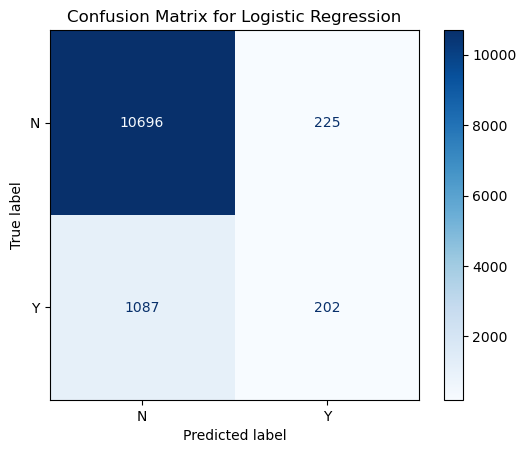

In [140]:
# Confusion Matrix for Logistic Regression
cm_lr = confusion_matrix(y_test, y_pred_lr)
disp_lr = ConfusionMatrixDisplay(confusion_matrix=cm_lr, display_labels=logistic_regression.classes_)
disp_lr.plot(cmap='Blues')
plt.title('Confusion Matrix for Logistic Regression')
plt.show()

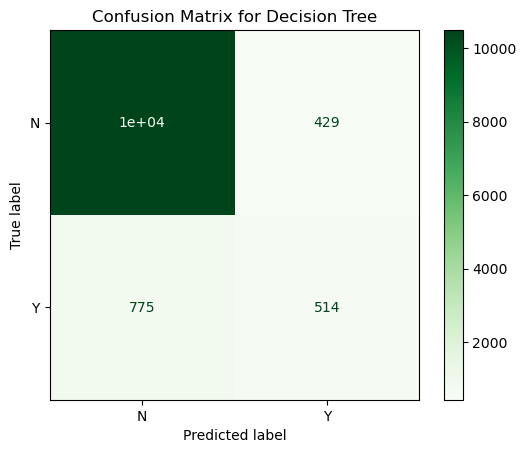

In [141]:
# Confusion Matrix for Decision Tree
cm_dt = confusion_matrix(y_test, y_pred_dt)
disp_dt = ConfusionMatrixDisplay(confusion_matrix=cm_dt, display_labels=decision_tree.classes_)
disp_dt.plot(cmap='Greens')
plt.title('Confusion Matrix for Decision Tree')
plt.show()

### Feature Importance for Decision Tree

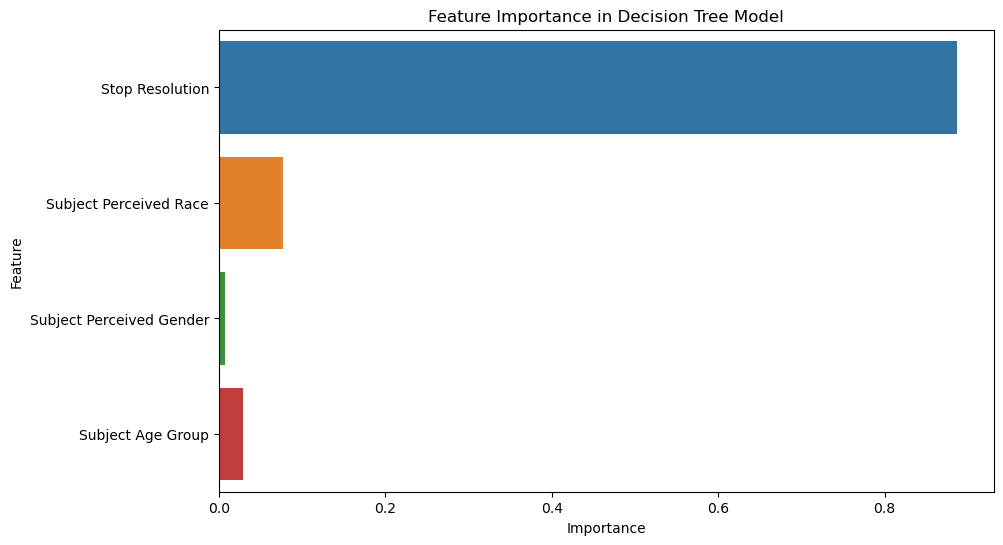

In [142]:
# Feature Importance for Decision Tree
plt.figure(figsize=(10, 6))
sns.barplot(x=decision_tree.feature_importances_, y=categorical_cols)
plt.title('Feature Importance in Decision Tree Model')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

### Coefficients for Logistic Regression

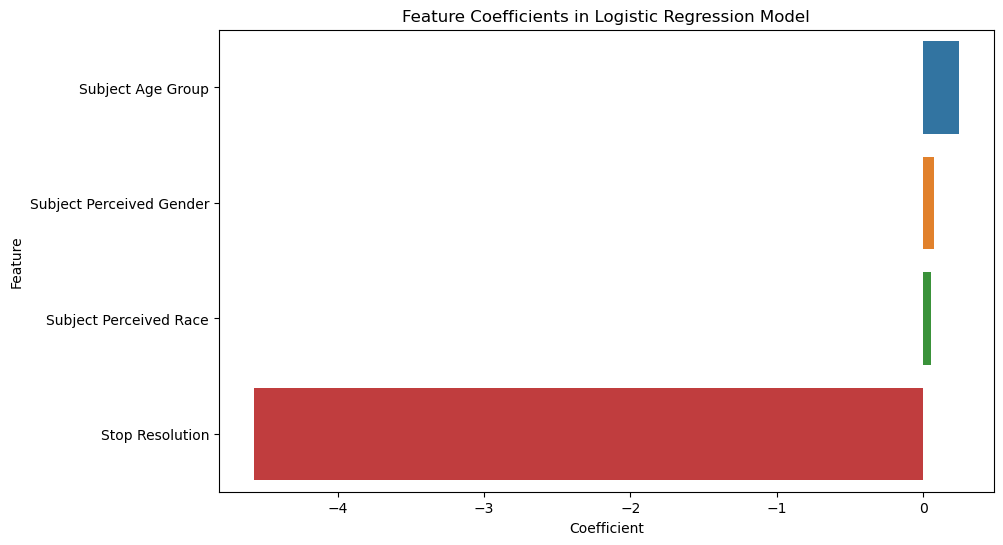

In [143]:
# Coefficients for Logistic Regression
coefficients = pd.DataFrame({'Feature': X_train.columns, 'Coefficient': logistic_regression.coef_[0]})
coefficients = coefficients.sort_values(by='Coefficient', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Coefficient', y='Feature', data=coefficients)
plt.title('Feature Coefficients in Logistic Regression Model')
plt.xlabel('Coefficient')
plt.ylabel('Feature')
plt.show()

### ROC Curve

In [144]:
# Convert 'No' to 0 and 'Yes' to 1 in y_test and predictions
y_test_binary = y_test.map({'N': 0, 'Y': 1})
y_pred_prob_lr = logistic_regression.predict_proba(X_test)[:, 1]
y_pred_prob_dt = decision_tree.predict_proba(X_test)[:, 1]

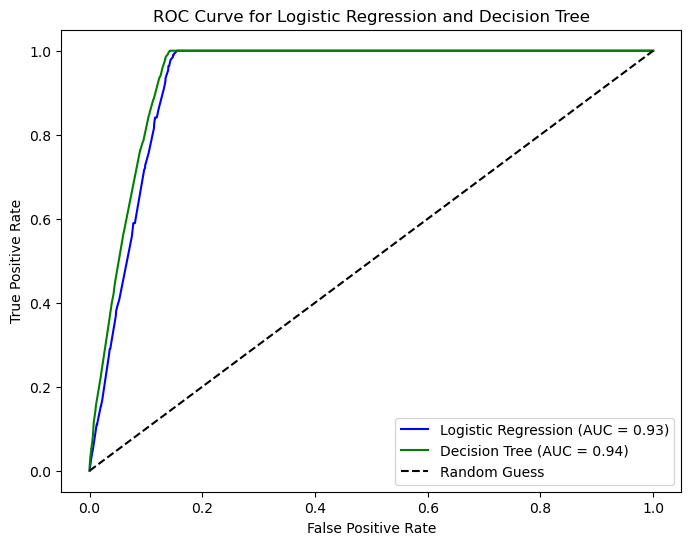

In [145]:
# Prediction probabilities for Logistic Regression
y_pred_prob_lr = logistic_regression.predict_proba(X_test)[:, 1]

# Prediction probabilities for Decision Tree
y_pred_prob_dt = decision_tree.predict_proba(X_test)[:, 1]

# ROC Curve for Logistic Regression
fpr_lr, tpr_lr, _ = roc_curve(y_test_binary, y_pred_prob_lr)
roc_auc_lr = roc_auc_score(y_test_binary, y_pred_prob_lr)

# ROC Curve for Decision Tree
fpr_dt, tpr_dt, _ = roc_curve(y_test_binary, y_pred_prob_dt)
roc_auc_dt = roc_auc_score(y_test_binary, y_pred_prob_dt)

# Plotting the ROC curves on a single graph
plt.figure(figsize=(8, 6))
plt.plot(fpr_lr, tpr_lr, label=f'Logistic Regression (AUC = {roc_auc_lr:.2f})', color='blue')
plt.plot(fpr_dt, tpr_dt, label=f'Decision Tree (AUC = {roc_auc_dt:.2f})', color='green')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Logistic Regression and Decision Tree')
plt.legend(loc='lower right')
plt.show()

## Cross-Validation

In [146]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score

In [147]:
# Define scoring metrics
scoring = {'accuracy': make_scorer(accuracy_score),
           'precision': make_scorer(precision_score, pos_label='Y'),
           'recall': make_scorer(recall_score, pos_label='Y'),
           'f1': make_scorer(f1_score, pos_label='Y')}

In [148]:
# Cross-validation for Logistic Regression
cv_scores_lr = cross_val_score(logistic_regression, X_train, y_train, cv=5, scoring='accuracy')
print(f"Cross-Validation Scores for Logistic Regression (Accuracy): {cv_scores_lr}")
print(f"Average Cross-Validation Score for Logistic Regression (Accuracy): {cv_scores_lr.mean()}")

# If you want to calculate multiple metrics at once:
from sklearn.model_selection import cross_validate
cv_results_lr = cross_validate(logistic_regression, X_train, y_train, cv=5, scoring=scoring)

# Print detailed cross-validation results
print("\nDetailed Cross-Validation Results for Logistic Regression:")
for key in scoring.keys():
    print(f"{key.capitalize()} Scores: {cv_results_lr['test_' + key]}")
    print(f"Average {key.capitalize()} Score: {cv_results_lr['test_' + key].mean()}")

Cross-Validation Scores for Logistic Regression (Accuracy): [0.89209664 0.89045864 0.89250614 0.89322277 0.88841114]
Average Cross-Validation Score for Logistic Regression (Accuracy): 0.8913390663390663

Detailed Cross-Validation Results for Logistic Regression:
Accuracy Scores: [0.89209664 0.89045864 0.89250614 0.89322277 0.88841114]
Average Accuracy Score: 0.8913390663390663
Precision Scores: [0.505      0.4872449  0.50853242 0.52449568 0.45797101]
Average Precision Score: 0.4966488025787116
Recall Scores: [0.28584906 0.18018868 0.28113208 0.17169811 0.14891612]
Average Recall Score: 0.21355680827983567
F1 Scores: [0.36506024 0.2630854  0.36208991 0.25870647 0.22475107]
Average F1 Score: 0.2947386179752469


In [149]:
# Cross-validation for Decision Tree
cv_scores_dt = cross_val_score(decision_tree, X_train, y_train, cv=5, scoring='accuracy')
print(f"\nCross-Validation Scores for Decision Tree (Accuracy): {cv_scores_dt}")
print(f"Average Cross-Validation Score for Decision Tree (Accuracy): {cv_scores_dt.mean()}")

# Calculate multiple metrics at once:
cv_results_dt = cross_validate(decision_tree, X_train, y_train, cv=5, scoring=scoring)

# Print detailed cross-validation results
print("\nDetailed Cross-Validation Results for Decision Tree:")
for key in scoring.keys():
    print(f"{key.capitalize()} Scores: {cv_results_dt['test_' + key]}")
    print(f"Average {key.capitalize()} Score: {cv_results_dt['test_' + key].mean()}")


Cross-Validation Scores for Decision Tree (Accuracy): [0.90120803 0.89946765 0.8996724  0.90284603 0.90120803]
Average Cross-Validation Score for Decision Tree (Accuracy): 0.9008804258804259

Detailed Cross-Validation Results for Decision Tree:
Accuracy Scores: [0.90120803 0.89946765 0.8996724  0.90284603 0.90120803]
Average Accuracy Score: 0.9008804258804259
Precision Scores: [0.56129032 0.54779412 0.55899705 0.58295964 0.56282723]
Average Precision Score: 0.5627736713523384
Recall Scores: [0.41037736 0.42169811 0.35754717 0.36792453 0.40527804]
Average Recall Score: 0.3925650418793235
F1 Scores: [0.47411444 0.47654584 0.43613349 0.45112782 0.47123288]
Average F1 Score: 0.4618308933323954
